<font color="blue">Олег привет. Давай смотреть твой план

# Оглавление

1. [Импорт библиотек](#import)
2. [Исследовательский анализ](#research)  
доделаю потом

<a id="import"></a>
# Импортирую библиотеки

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

# metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from scipy.stats import chi2_contingency

In [2]:
#install
!pip3 install catboost --upgrade
from catboost import CatBoostClassifier
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: catboost in /home/jovyan/.local/lib/python3.7/site-packages (1.0.4)
Defaulting to user installation because normal site-packages is not writeable
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
# !pip3 install lightgbm
# import lightgbm as lgbm

In [4]:
import warnings # отключу уведомления
warnings.filterwarnings("ignore")

<a id="research"></a>
# Исследовательский анализ

## Загружу данные

In [5]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

df_contract = pd.read_csv('contract.csv')
df_internet = pd.read_csv('internet.csv')
df_personal = pd.read_csv('personal.csv')
df_phone = pd.read_csv('phone.csv')

## Изучу данные

In [6]:
print('df_contract shape:', df_contract.shape)
print('df_internet shape:', df_internet.shape)
print('df_personal shape:', df_personal.shape)
print('df_phone shape:', df_phone.shape)

df_contract shape: (7043, 8)
df_internet shape: (5517, 8)
df_personal shape: (7043, 5)
df_phone shape: (6361, 2)


Проверю на пропущенные значения:

In [7]:
[x.isna().sum() for x in [df_contract, df_internet, df_personal, df_phone]]

[customerID          0
 BeginDate           0
 EndDate             0
 Type                0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 dtype: int64,
 customerID          0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 dtype: int64,
 customerID       0
 gender           0
 SeniorCitizen    0
 Partner          0
 Dependents       0
 dtype: int64,
 customerID       0
 MultipleLines    0
 dtype: int64]

In [8]:
[x.duplicated().sum() for x in [df_contract, df_internet, df_personal, df_phone]]

[0, 0, 0, 0]

Дубликатов строк нет

### Contract dataset

In [9]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [10]:
df_contract.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


### Internet dataset

In [11]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


In [12]:
df_internet.head(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


### Personal dataset

In [13]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [14]:
df_personal.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


### Phone dataset

In [15]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


In [16]:
df_phone.head(5)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Супер, данные на базе и есть первичный аналитический осмотр)

## Предобработка данных

Напишу функцию для замены бинарных значений "Yes/No" на "1/0":

### Датасет `df_contract`

Применю функцию замены бинарных значений:

Поправлю типы данных в `BeginDate` и в `EndDate` на `datetime64`:

In [17]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])

In [18]:
df_contract.loc[df_contract['EndDate'] == "No", 'EndDate'] = np.NaN

In [19]:
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'])

In [20]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             1869 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 440.3+ KB


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК

Изменю значения признака `SeniorCitizen`:

In [21]:
def renamer(dataframe, list_columns):
    (
    [dataframe.replace({column: {1:'Yes', 0:'No'}}, inplace=True)
     for column
     in list_columns]
    )

In [22]:
renamer(df_personal, ['SeniorCitizen'])

In [23]:
df_contract[df_contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,


Удалю строки с новичками в `TotalCharges`, т.к. они бесполезны для нашего исследования и мешают признаку быть полностью с типом `float64`:

In [24]:
df_contract = df_contract[df_contract['TotalCharges'] != ' ']

In [25]:
df_contract.dropna(subset=['TotalCharges'], inplace=True)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
понятно, 11 строк - не критично ни один тип подстановок: удаление, ноль, медиана... Но если смотреть через призму системного подхода, то прежде, чем принимать решение о подстановке пропусков, лучше изучить самих клиентов. Кто они, какие договора... и тогда уже принимать решение... (надо сказать, что данные клиенты - новички, ну и, соответственно, ещё не успели ничено оплатить)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='black'> <b><u>Студента 1</u></b>
</font>
<font color='black'><br>Ты прав, добавил выше просмотр этой подвыборки. Я их удалю вместо замены значений.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>ок)

In [26]:
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')

In [27]:
df_contract.isna().sum()

customerID             0
BeginDate              0
EndDate             5163
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
dtype: int64

Создам новый признак — время жизни клиента `life_time_na` с учётом пропущенных значений. Если данных в `EndTime` нет, значит клиент ещё не ушёл.

In [28]:
df_contract['life_time_na'] = df_contract['EndDate'] - df_contract['BeginDate']
print('Кол-во timedelta-значений:',
      np.invert(np.isnat(df_contract['life_time_na'])).sum(),
      '— это закончившиеся контракты.')
print('Кол-во пустых значений:',
      np.isnat(df_contract['life_time_na']).sum(),
      '— это действующие контракты.')

Кол-во timedelta-значений: 1869 — это закончившиеся контракты.
Кол-во пустых значений: 5163 — это действующие контракты.


Для абонентов без `EndDate` присвою дату выгрузки (01.02.2020) вместо `NaN`:

In [29]:
last_date = datetime.strptime('01.02.2020', '%d.%m.%Y')


In [30]:
df_contract.loc[df_contract['EndDate'].isna(), ['EndDate']] = last_date

In [31]:
df_contract['EndDate']

0      2020-02-01
1      2020-02-01
2      2019-12-01
3      2020-02-01
4      2019-11-01
          ...    
7038   2020-02-01
7039   2020-02-01
7040   2020-02-01
7041   2019-11-01
7042   2020-02-01
Name: EndDate, Length: 7032, dtype: datetime64[ns]

In [32]:
###############
df_contract['life_time'] = df_contract['EndDate'] - df_contract['BeginDate']
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 10 columns):
customerID          7032 non-null object
BeginDate           7032 non-null datetime64[ns]
EndDate             7032 non-null datetime64[ns]
Type                7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
life_time_na        1869 non-null timedelta64[ns]
life_time           7032 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), object(4), timedelta64[ns](2)
memory usage: 604.3+ KB


#### Добавлю признаки

Создам признак `LifeTimeMonths`, чтобы оперировать не `timedelta`:

In [33]:
df_contract['LifeTimeMonths'] = (12 * 
                                 (df_contract['EndDate'].map(lambda x: x.year) -
                                 df_contract['BeginDate'].map(lambda x: x.year)) +
                                 (df_contract['EndDate'].map(lambda x: x.month) -
                                 df_contract['BeginDate'].map(lambda x: x.month)))

In [34]:
df_contract['LifeTimeMonths']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: LifeTimeMonths, Length: 7032, dtype: int64

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
нужный признак, ОК.

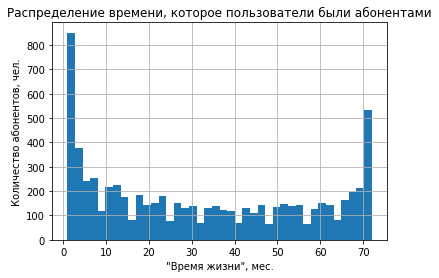

In [35]:
df_contract['LifeTimeMonths'].hist(bins=40)
plt.title('Распределение времени, которое пользователи были абонентами')
plt.xlabel('"Время жизни", мес.')
plt.ylabel('Количество абонентов, чел.')
plt.show()

Видно, что очень много клиентов пользовались услугами менее 2 месяцев или более 70 месяцев.

Создам признак времени жизни клиента в днях:

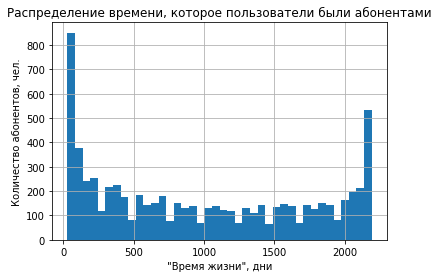

In [36]:
df_contract['LifeTimeDays'] = df_contract['life_time'].map(lambda x: x.days)
df_contract['LifeTimeDays'] = [float(x) for x in df_contract['LifeTimeDays']]

df_contract['LifeTimeDays'].hist(bins=40)
plt.title('Распределение времени, которое пользователи были абонентами')
plt.xlabel('"Время жизни", дни')
plt.ylabel('Количество абонентов, чел.')
plt.show()

Чтобы `TotalCharges` не суммировала `MonthlyCharges`, избавлюсь от признака, но выделю новый — `AdditionalCharges`:

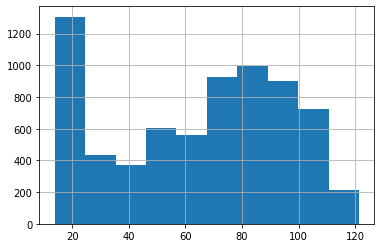

In [37]:
df_contract['AvMonthCharges'] = df_contract['TotalCharges'] / df_contract['LifeTimeMonths']
df_contract['AvMonthCharges'].hist()

In [38]:
df_contract[['MonthlyCharges', 'AvMonthCharges']].head(5)

,MonthlyCharges,AvMonthCharges
0,29.85,29.850000
1,56.95,55.573529
2,53.85,54.075000
3,42.30,40.905556
4,70.70,75.825000


### Датасет `df_internet`

### Датасет `df_personal`

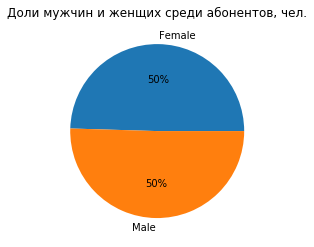

In [39]:
male_female = df_personal.groupby(by='gender').count().reset_index().iloc[:,0:2]
plt.pie(male_female['customerID'], labels = male_female['gender'], autopct='%.0f%%')
plt.title('Доли мужчин и женщих среди абонентов, чел.')
plt.show()

In [40]:
df_personal = df_personal.astype('str')

In [41]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null object
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: object(5)
memory usage: 275.2+ KB


In [42]:
def object_string(dataframe, list_columns):
    [dataframe[column].str(dataframe[list_columns]) for column in list_columns]
    return dataframe

In [43]:
#object_string(df_personal, df_personal.columns)

### Датасет `df_phone`

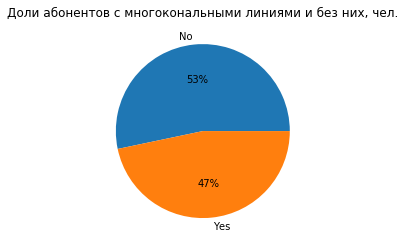

In [44]:
MultipleLinesPie = df_phone.groupby(by='MultipleLines').count().reset_index().iloc[:,0:2]
plt.pie(MultipleLinesPie['customerID'],
        labels = MultipleLinesPie['MultipleLines'],
        autopct='%.0f%%')
plt.title('Доли абонентов с многокональными линиями и без них, чел.')
plt.show()

Мужчие и женщин в выборке поровну.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Чёткий анализ. Напомню только, что графический анализ - это предположение/гипотеза. И чтобы её подтвердить или опровергнуть также следует применять аналитические методы анализа из области "проверка гипотез".

### Объединение датасетов

In [45]:
df = df_personal.copy()

In [46]:
df.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [47]:
df = df.merge(
    df_contract, on='customerID', how='left'
).merge(df_internet, on='customerID', how='left').merge(df_phone, on='customerID', how='left')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
BeginDate           7032 non-null datetime64[ns]
EndDate             7032 non-null datetime64[ns]
Type                7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
life_time_na        1869 non-null timedelta64[ns]
life_time           7032 non-null timedelta64[ns]
LifeTimeMonths      7032 non-null float64
LifeTimeDays        7032 non-null float64
AvMonthCharges      7032 non-null float64
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null 

### Избавлюсь от `NaN`

In [49]:
df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
BeginDate             11
EndDate               11
Type                  11
PaperlessBilling      11
PaymentMethod         11
MonthlyCharges        11
TotalCharges          11
life_time_na        5174
life_time             11
LifeTimeMonths        11
LifeTimeDays          11
AvMonthCharges        11
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

Признак `life_time` я далее не буду использовать для фичей.  
Пропуски в остальных признаках встречаются там, где абонент не использовал услугу, значит можно заменить пропуски на `0`.

In [50]:
list_for_fillna = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'MultipleLines']

df[list_for_fillna] = df[list_for_fillna].fillna(0)
df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
BeginDate             11
EndDate               11
Type                  11
PaperlessBilling      11
PaymentMethod         11
MonthlyCharges        11
TotalCharges          11
life_time_na        5174
life_time             11
LifeTimeMonths        11
LifeTimeDays          11
AvMonthCharges        11
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
dtype: int64

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
супер! согласен.

## Исследовательский анализ данных

In [51]:
#contract_type = df_contract.groupby(by='Type').count().reset_index().iloc[:,0:2].set_axis(['type', 'count'], axis=1)
#sns.barplot(data=contract_type, x='type', y='count', palette="Blues_d")

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='red'><br>упс( не пошло.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='black'> <b><u>Студента 1</u></b>
</font>
<font color='black'><br>Удалил признак и забыл удалить график по нему.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>) у самого бывает такое..

In [52]:
df[['MonthlyCharges', 'AvMonthCharges', 'TotalCharges']].isna().sum()

MonthlyCharges    11
AvMonthCharges    11
TotalCharges      11
dtype: int64

В созданном признаке `AvMonthCharges` есть 11 пропущенных значений из-за операции деления. Удалю эти строки:

In [53]:
df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
BeginDate             11
EndDate               11
Type                  11
PaperlessBilling      11
PaymentMethod         11
MonthlyCharges        11
TotalCharges          11
life_time_na        5174
life_time             11
LifeTimeMonths        11
LifeTimeDays          11
AvMonthCharges        11
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
dtype: int64

In [54]:
df.dropna(subset=['AvMonthCharges'], inplace=True)

## Выводы по результатам исследовательского анализа

Нам достатались достаточно чистые данные, распределение категорий довольно репрезентативное.

### To Do list для работы, мои заметки.

- [ ] Добавить признак life_time, удалить связанные.  
- [ ] TotalCharges - посмотреть, что за клиенты  
- [ ] Ежемесячная оплата сразу, за услуги по итогу месяца — на что это влияет
- [ ] Итоговая метрика ROC-AUC, смотрим на accuracy.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
👍👍  Хорошо, на самом деле, поработал в этом разделе.

# Модель классификации

## Подготовка данных

Создам признаки и целевое значение. Присвою абонентам без `EndDate` значение таргета **`0`, т.е. абонент остаётся**, а с отсутствующим значением признака значение **`1`, т.е. абонент уходит**.

In [55]:
df['GoOut'] = [0 if pd.isnull(x) else 1 for x in df['life_time_na']]

In [56]:
df = df.drop(['life_time_na'], axis=1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ок

### Кодирование данных OHE

In [57]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Type',
                        'PaperlessBilling', 'PaymentMethod','InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'MultipleLines']

In [58]:
dummies = pd.get_dummies(df[categorical_features], drop_first=True, dtype='int64')
df_ohe = pd.concat((df, dummies), 1)
df_ohe = df_ohe.drop(categorical_features, axis=1)
df_ohe.shape

(7032, 36)

In [59]:
df_ohe.columns

Index(['customerID', 'BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges',
       'life_time', 'LifeTimeMonths', 'LifeTimeDays', 'AvMonthCharges',
       'GoOut', 'gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'Type_One year', 'Type_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'MultipleLines_No', 'MultipleLines_Yes'],
      dtype='object')

Установлю `customerID` в качестве индекса.

In [60]:
df.set_index('customerID', drop=True, inplace=True)
df_ohe.set_index('customerID', drop=True, inplace=True)

Вижу сильную связи таргета с `TotalCharges` и `LifeTimeMonths`: 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>не увидел(

<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='black'> <b><u>Студента 1</u></b>
</font>
<font color='black'><br>Коммент был не в том месте, перетащил после матрицы корреляции. Вижу 0.825880 между `TotalCharges` и `LifeTimeMonths`.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>понял, спасибо.

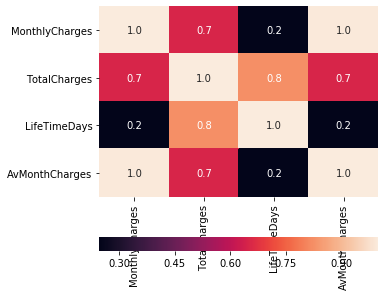

In [61]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(df_ohe[['MonthlyCharges', 'TotalCharges', 'LifeTimeDays', 'AvMonthCharges']].corr(),
            annot=True,
            #.figsize=(10,10),
            annot_kws={"size":10},
            fmt='.1f',
            cbar_kws= {'orientation': 'horizontal'})
plt.show()

<div style="background: #ffeeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>аааа, вот они, теперь понял. Тут такой момент:<br>
важный момент по корреляциям: данная корреляция Спирмена/Пирсона - разрабатывался для количественных шкал. Если данные в бинарной шкале (пол, тип услуги....) - техника не подходит, лучше не опираться на данные выводы.<br>
    
Поэтому выводы можно делать только по количественным данным (в нашем случае - финансы и длительность контракта)


<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='black'> <b><u>Студента 1</u></b>
</font>
<font color='black'><br> Понял, теперь смотрю только на количественные признаки.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>👍 

Дополнительное исследование корреляций.

Возьму гипотезу о том, что пожилые люди не заказывают услугу "безбумажной отчётности".

In [62]:
count_table = pd.crosstab(df['PaperlessBilling'], df['SeniorCitizen'])
count_table

SeniorCitizen,No,Yes
PaperlessBilling,,
No,2598,266
Yes,3292,876


In [63]:
chi2_contingency(count_table)

(170.83550268161997,
 4.860566886559332e-39,
 1,
 array([[2398.8850967,  465.1149033],
        [3491.1149033,  676.8850967]]))

Полагаю можно заключить, что при вводных:  
кол-во степеней свободы df=1  
p-value=0.05  
x2 (хи-квадрат) = 4.86
... можно заключить: признаки `PaperlessBilling` и `SeniorCitizen` независимы.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='black'> <b><u>Студента 1</u></b>
</font>
<font color='black'><br> Не уверен, что сделал правильный вывод. Как ты считаешь?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>нулевая гипотеза, что различий нет. р-уровень меньш 5 сотых. Это значит, что нулевую гипотезу отвергаем и принимаем обратную. Что различие по этому фактору у отточников и не отточников статистически значимо.

### Выделю признаки и целевое значение.

In [64]:
target = df[['GoOut']]
len(target)

7032

In [65]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'BeginDate',
       'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'life_time', 'LifeTimeMonths',
       'LifeTimeDays', 'AvMonthCharges', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'MultipleLines', 'GoOut'],
      dtype='object')

Удалю лишние признаки, которые связаны с другими признаками.

In [66]:
features = df.drop(['BeginDate', 'life_time', 'EndDate',
                    'TotalCharges', 'GoOut', 'MonthlyCharges'], axis=1)
features_ohe = df_ohe.drop(['BeginDate', 'life_time', 'EndDate',
                            'TotalCharges', 'GoOut', 'MonthlyCharges'], axis=1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОТЛИЧНО, что удаляешь факторы-даты!!!!! Если у нас тема НЕ временные ряды, то такие факторы лучше не использовать. Они "нагонят" метрики, но бизнес-эффективность модели  - рухнет.

Удалю также `LifeTimeMonths`, использую вместо него `LifeTimeDays`:

In [67]:
features = features.drop(['LifeTimeMonths'], axis=1)
features_ohe = features_ohe.drop(['LifeTimeMonths'], axis=1)

In [68]:
features.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Type',
       'PaperlessBilling', 'PaymentMethod', 'LifeTimeDays', 'AvMonthCharges',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'],
      dtype='object')

Проверю зависимости в `features_ohe`:

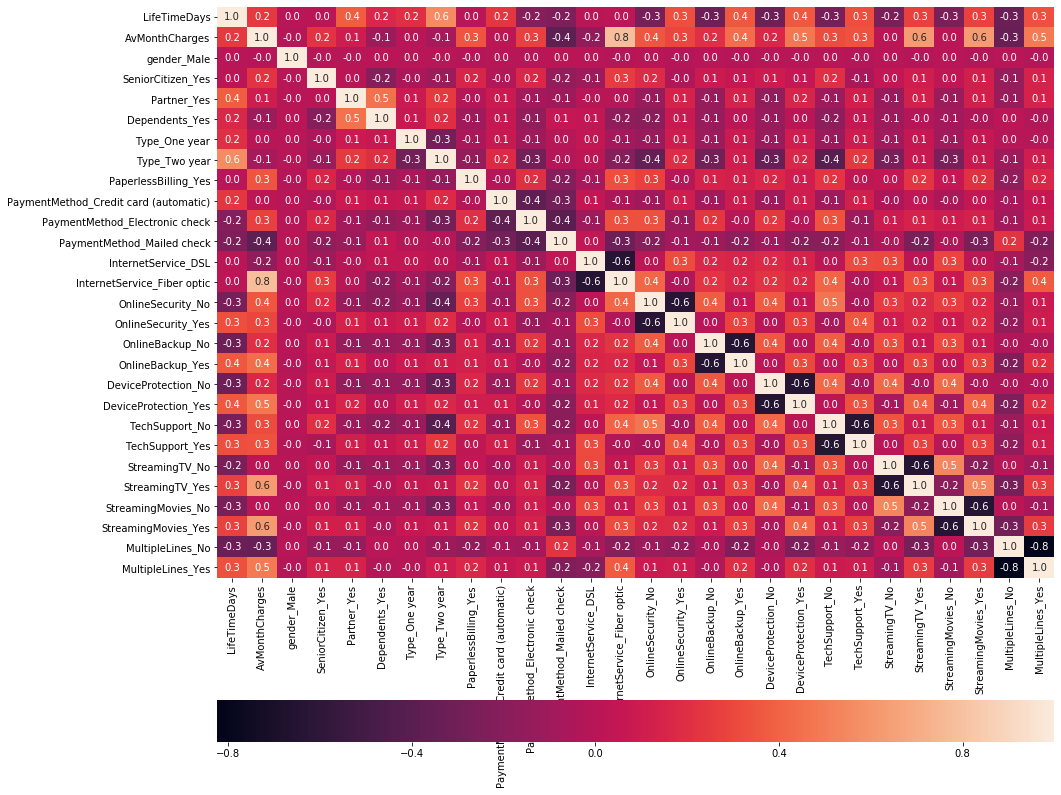

In [69]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(features_ohe.corr(),
            annot=True,
            #.figsize=(10,10),
            annot_kws={"size":10},
            fmt='.1f',
            cbar_kws= {'orientation': 'horizontal'})
plt.show()

Удалю ещё некоторые признаки, которые врядли влияют на предсказания:

In [70]:
features.columns
features_ohe.columns

Index(['LifeTimeDays', 'AvMonthCharges', 'gender_Male', 'SeniorCitizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'Type_One year', 'Type_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'MultipleLines_No', 'MultipleLines_Yes'],
      dtype='object')

In [71]:
features = features.drop(['gender'], axis=1)
features_ohe = features_ohe.drop(['gender_Male'], axis=1)

### Разобью выборку на обучающую и тестовую.

In [72]:
features_train, features_test = train_test_split(features, test_size=0.25, random_state=12345)
features_train.shape, features_test.shape

((5274, 16), (1758, 16))

In [73]:
target_train, target_test = train_test_split(target, test_size=0.25, random_state=12345)
target_train.shape, target_test.shape

((5274, 1), (1758, 1))

In [74]:
#target_train.value_counts(), target_test.value_counts()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>
упс(

<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='black'> <b><u>Студента 1</u></b>
</font>
<font color='black'><br> Поправил. Почему-то локально у меня `value_counts()` отрабатывает на датафрейме.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>библиотеки...

In [75]:
# проверка
features_train.head()

,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,LifeTimeDays,AvMonthCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,
2696-NARTR,No,No,No,Month-to-month,Yes,Electronic check,335.0,84.204545,Fiber optic,No,No,No,Yes,No,No,No
7639-OPLNG,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),2132.0,81.883571,DSL,Yes,Yes,Yes,Yes,Yes,No,Yes
6650-VJONK,No,No,No,Month-to-month,Yes,Bank transfer (automatic),31.0,43.850000,DSL,No,No,No,No,No,No,No
9801-GDWGV,No,No,No,Month-to-month,Yes,Electronic check,1187.0,102.421795,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7033-CLAMM,No,Yes,Yes,Two year,No,Bank transfer (automatic),1461.0,21.401042,0,0,0,0,0,0,0,No


In [76]:
# признаки и таргеты после OHE
features_ohe_train, features_ohe_test = train_test_split(
    features_ohe, test_size=0.25, random_state=12345)
features_ohe_train.shape, features_ohe_test.shape

((5274, 27), (1758, 27))

## Обучение модели

In [77]:
features_ohe_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5274 entries, 2696-NARTR to 7569-NMZYQ
Data columns (total 27 columns):
LifeTimeDays                             5274 non-null float64
AvMonthCharges                           5274 non-null float64
SeniorCitizen_Yes                        5274 non-null int64
Partner_Yes                              5274 non-null int64
Dependents_Yes                           5274 non-null int64
Type_One year                            5274 non-null int64
Type_Two year                            5274 non-null int64
PaperlessBilling_Yes                     5274 non-null int64
PaymentMethod_Credit card (automatic)    5274 non-null int64
PaymentMethod_Electronic check           5274 non-null int64
PaymentMethod_Mailed check               5274 non-null int64
InternetService_DSL                      5274 non-null int64
InternetService_Fiber optic              5274 non-null int64
OnlineSecurity_No                        5274 non-null int64
OnlineSecurity_Yes       

### RandomForest

In [78]:
model_forest = RandomForestClassifier(random_state=12345,
                                      n_estimators=100,
                                      max_depth=10,
                                      class_weight='balanced', #{0:1,1:4},
                                      max_features=9,
                                      min_samples_leaf=5)

In [79]:
#features_ohe_train.isna().sum()
#features_ohe_train.info()
#target_train
target_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1758 entries, 6322-PJJDJ to 8439-LTUGF
Data columns (total 1 columns):
GoOut    1758 non-null int64
dtypes: int64(1)
memory usage: 27.5+ KB


In [80]:
model_forest.fit(features_ohe_train,
                 target_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=9,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False)

In [81]:
pred_forest = model_forest.predict(features_ohe_test)

In [82]:
print('ROC-AUC RandomForestClasifier:', roc_auc_score(target_test.values, pred_forest))
print('F1 score RandomForestClasifier:', f1_score(target_test.values, pred_forest))

ROC-AUC RandomForestClasifier: 0.7751041588703441
F1 score RandomForestClasifier: 0.6544754571703562


<div style="background: #ffeeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
для расчёта аук используется predict(). Попробуй predict_proba()

In [83]:
probabilities_forest = model_forest.predict_proba(features_ohe_test)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_forest[:, 1])

In [84]:
print('ROC-AUC (predict_proba) RandomForestClasifier:', roc_auc_score(target_test.values, model_forest.predict_proba(features_ohe_test)[:,1]))

ROC-AUC (predict_proba) RandomForestClasifier: 0.8686117971875026


<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='black'> <b><u>Студента 1</u></b>
</font>
<font color='black'><br> Что-то я не понял, почему получается иная ROC-AUC? Это связано с изменением порога классификации?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>примерно так, да. Просто predict() - считает на пороге 0.5.

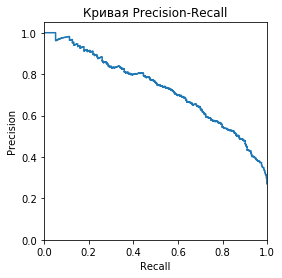

In [85]:
plt.figure(figsize=(4, 4))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()

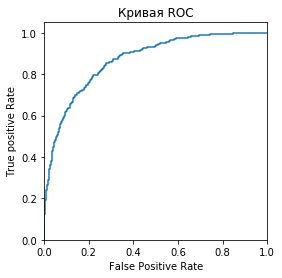

In [86]:
probabilities = model_forest.predict_proba(features_ohe_test.values)
fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])
# построю кривую ROC
plt.figure(figsize=(4, 4))
plt.step(fpr, tpr, where='post')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC')
plt.show()

##### Важность признаков

In [87]:
importances = model_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_forest.estimators_], axis=0)

Построю график важности признаков:

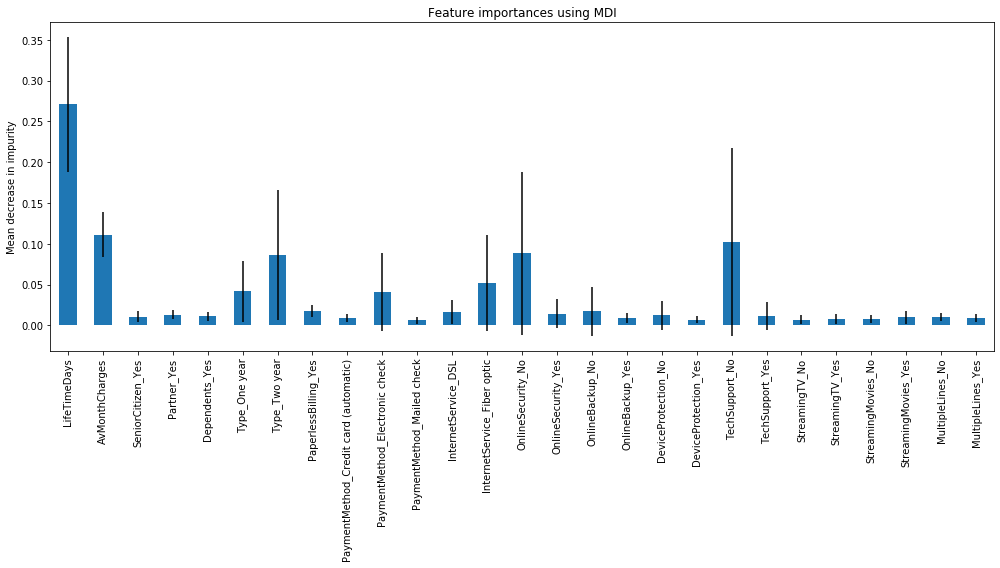

In [88]:
forest_importances = pd.Series(importances, index=features_ohe_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(14,8))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


Здесь можно сделать вывод, что некоторые признаки оказывают малое влияние на точность модели. Сохраню их названия в спискок, чтобы проверить, как как будет в других моделях:

In [89]:
bad_features = ['SeniorCitizen_Yes',
                'PaymentMethod_Credit card (automatic)',
                'PaymentMethod_Electronic check',
                'DeviceProtection_Yes',
                'StreamingMovies_No',
                'StreamingTV_No',
                'StreamingTV_Yes',
                'MultipleLines_Yes'
               ]

In [90]:
features_ohe_train.columns

Index(['LifeTimeDays', 'AvMonthCharges', 'SeniorCitizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'Type_One year', 'Type_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'MultipleLines_No', 'MultipleLines_Yes'],
      dtype='object')

<a id="question1"></a>
Не уверен, что можно отделять закодированные признаки. Например, убрать 'PaymentMethod_Credit card (automatic)', но оставить 'PaymentMethod_Electronic check'. Какие комментарии на этот счёт?

In [91]:
features_ohe_good = features_ohe.drop(bad_features, axis=1)

In [92]:
# признаки и таргеты после OHE
features_ohe_train_good, features_ohe_test_good = train_test_split(
    features_ohe_good, test_size=0.25, random_state=12345)
features_ohe_train_good.shape, features_ohe_test_good.shape

((5274, 19), (1758, 19))

In [93]:
model_forest_good = RandomForestClassifier(random_state=12345,
                                      n_estimators=100,
                                      max_depth=10,
                                      class_weight='balanced', #{0:1,1:4},
                                      max_features=9,
                                      min_samples_leaf=5)

In [94]:
model_forest_good.fit(features_ohe_train_good,
                 target_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=9,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False)

In [95]:
pred_forest_good = model_forest_good.predict(features_ohe_test_good)

In [96]:
print('ROC-AUC RandomForestClasifier:',
      roc_auc_score(target_test.values, pred_forest_good),
      '\nРазница:',
      roc_auc_score(target_test.values, pred_forest_good)-roc_auc_score(target_test.values, pred_forest))
print('F1 score RandomForestClasifier:', f1_score(target_test.values, pred_forest_good))


ROC-AUC RandomForestClasifier: 0.7807349749270264 
Разница: 0.005630816056682253
F1 score RandomForestClasifier: 0.6627906976744187


In [97]:
probabilities_forest_good = model_forest_good.predict_proba(features_ohe_test_good)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_forest_good[:, 1])
print('ROC-AUC (predict_proba) RandomForestClasifier:',
      roc_auc_score(target_test.values, model_forest_good.predict_proba(features_ohe_test_good)[:,1]),
      '\nРазница:',
      roc_auc_score(target_test.values, model_forest_good.predict_proba(features_ohe_test_good)[:,1])-
      roc_auc_score(target_test.values, model_forest.predict_proba(features_ohe_test)[:,1])
     )

ROC-AUC (predict_proba) RandomForestClasifier: 0.8725311645003285 
Разница: 0.003919367312825939


После удаления фичей немного упала метрика ROC-AUC, подросла метрика, посчитанная на `predict_proba()`.

#### RandomForest с CridSearchCV

In [98]:
features_ohe.head()

,LifeTimeDays,AvMonthCharges,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MultipleLines_No,MultipleLines_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,31.0,29.850000,0,1,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0
5575-GNVDE,1036.0,55.573529,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3668-QPYBK,61.0,54.075000,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
7795-CFOCW,1371.0,40.905556,0,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,0,0,0
9237-HQITU,61.0,75.825000,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


In [99]:
%%time
model_forest_gs = RandomForestClassifier(random_state=12345,
                                         class_weight='balanced',
                                         max_features=9,
                                         min_samples_leaf=5)
forest_parameters = {
    'max_depth': range(11, 16, 2),
    'n_estimators': range(200, 402, 100)
}
grid_forest = GridSearchCV(estimator=model_forest_gs,
                            param_grid=forest_parameters,
                            cv=3,
                            scoring='accuracy',
                            verbose=2
                            )
grid_forest.fit(features_ohe_train, target_train)
print('best_params_:', grid_forest.best_params_)
print('best_estimator_:', grid_forest.best_estimator_)
pred_forest_gs = grid_forest.predict(features_ohe_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=11, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... max_depth=11, n_estimators=200, total=   1.3s
[CV] max_depth=11, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ................... max_depth=11, n_estimators=200, total=   1.3s
[CV] max_depth=11, n_estimators=200 ..................................
[CV] ................... max_depth=11, n_estimators=200, total=   1.2s
[CV] max_depth=11, n_estimators=300 ..................................
[CV] ................... max_depth=11, n_estimators=300, total=   1.9s
[CV] max_depth=11, n_estimators=300 ..................................
[CV] ................... max_depth=11, n_estimators=300, total=   1.8s
[CV] max_depth=11, n_estimators=300 ..................................
[CV] ................... max_depth=11, n_estimators=300, total=   1.8s
[CV] max_depth=11, n_estimators=400 ..................................
[CV] ................... max_depth=11, n_estimators=400, total=   2.4s
[CV] max_depth=11, n_estimators=400 ..................................
[CV] ................... max_depth=11, n_estimators=400, total=   2.4s
[CV] max_depth=11, n_estimators=400 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   49.9s finished


best_params_: {'max_depth': 13, 'n_estimators': 300}
best_estimator_: RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=13, max_features=9,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False)
CPU times: user 52 s, sys: 233 ms, total: 52.2 s
Wall time: 52.5 s


In [100]:
print('ROC-AUC RandomForestClasifier with GridSearchCV:', roc_auc_score(target_test.values, pred_forest_gs))
print('F1 score RandomForestClasifier with GridSearchCV:', f1_score(target_test.values, pred_forest_gs))

ROC-AUC RandomForestClasifier with GridSearchCV: 0.7754808771798517
F1 score RandomForestClasifier with GridSearchCV: 0.6593625498007968


<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='black'><br> Новый код 2 ячейки:

In [101]:
probabilities_forest_gs = grid_forest.predict_proba(features_ohe_test)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_forest_gs[:, 1])

In [102]:
print('ROC-AUC (predict_proba) RandomForestClasifier:', roc_auc_score(target_test.values, grid_forest.predict_proba(features_ohe_test)[:,1]))

ROC-AUC (predict_proba) RandomForestClasifier: 0.8680928739532138


### CatBoost

In [103]:
model_cb = CatBoostClassifier(loss_function="Logloss", iterations=10)

In [104]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents', 'Type',
       'PaperlessBilling', 'PaymentMethod','InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'MultipleLines']
model_cb.fit(features_train, target_train, cat_features=cat_features, verbose=2, plot=True)
pred_cb = model_cb.predict(features_test)
print('ROC-AUC CatBoost:', roc_auc_score(target_test.values, pred_cb))
print('Accuracy CatBoost:', accuracy_score(target_test.values, pred_cb))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.5
0:	learn: 0.5438399	total: 60.6ms	remaining: 546ms
2:	learn: 0.4417929	total: 83ms	remaining: 194ms
4:	learn: 0.4120211	total: 106ms	remaining: 106ms
6:	learn: 0.4025837	total: 119ms	remaining: 50.9ms
8:	learn: 0.3953909	total: 136ms	remaining: 15.2ms
9:	learn: 0.3899176	total: 146ms	remaining: 0us
ROC-AUC CatBoost: 0.7241673527430581
Accuracy CatBoost: 0.8191126279863481


In [105]:
model_catboost = CatBoostClassifier(verbose=100,
                           iterations=500,
                           loss_function='Logloss',
                           learning_rate=0.7,
                           early_stopping_rounds=200,
                           eval_metric='F1',
                           auto_class_weights='Balanced',
                           random_seed=12345,
                           #use_best_model=True,
                           depth=8
                           )

In [106]:
model_catboost.fit(features_train, target_train, cat_features=cat_features, verbose=100, plot=True)
pred_catboost = model_catboost.predict(features_test)
print('ROC-AUC CatBoost:', roc_auc_score(target_test.values, pred_catboost))
print('Accuracy CatBoost:', accuracy_score(target_test.values, pred_catboost))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7633628	total: 29.5ms	remaining: 14.7s
100:	learn: 0.9837208	total: 5.69s	remaining: 22.5s
200:	learn: 0.9983232	total: 11.6s	remaining: 17.2s
300:	learn: 0.9998708	total: 17.4s	remaining: 11.5s
400:	learn: 1.0000000	total: 23.2s	remaining: 5.72s
499:	learn: 1.0000000	total: 28.5s	remaining: 0us
ROC-AUC CatBoost: 0.7780630192350872
Accuracy CatBoost: 0.8447098976109215


<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='black'><br> Новый код 2 ячейки:

In [107]:
probabilities_catboost = model_catboost.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_forest[:, 1])

In [108]:
print('ROC-AUC (predict_proba) CatBoost:', roc_auc_score(
    target_test.values,
    model_catboost.predict_proba(features_test)[:,1]))

ROC-AUC (predict_proba) CatBoost: 0.8729636005289027


### CatBoost with GridSearch

In [109]:
%%time
model_cb_gs = CatBoostClassifier(random_seed=12345,
                                 loss_function='Logloss',
                                 auto_class_weights='Balanced',
                                )
cb_parameters = {
    'iterations': range(5, 40, 20),
    'depth': range(1, 16, 2)
}
grid_cb_gs = GridSearchCV(estimator=model_cb_gs,
                          param_grid=cb_parameters,
                          cv=5,
                          scoring='roc_auc',
                          verbose=10
                         )
grid_cb_gs.fit(features_train, target_train, cat_features=cat_features, verbose=3)
pred_catboost_gs = grid_cb_gs.predict(features_test)
print('ROC-AUC CatBoost with GridSearch:', roc_auc_score(target_test.values, pred_catboost_gs))
print('Accuracy CatBoost with GridSearch:', accuracy_score(target_test.values, pred_catboost_gs))
pred_cb_gs = grid_cb_gs.predict(features_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] depth=1, iterations=5 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Learning rate set to 0.5
0:	learn: 0.6433793	total: 3.29ms	remaining: 13.2ms
3:	learn: 0.5420721	total: 10.7ms	remaining: 2.67ms
4:	learn: 0.5277181	total: 12.6ms	remaining: 0us
[CV] ............... depth=1, iterations=5, score=0.791, total=   1.7s
[CV] depth=1, iterations=5 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Learning rate set to 0.5
0:	learn: 0.6453962	total: 3.15ms	remaining: 12.6ms
3:	learn: 0.5398586	total: 10.9ms	remaining: 2.72ms
4:	learn: 0.5272794	total: 12.9ms	remaining: 0us
[CV] ............... depth=1, iterations=5, score=0.810, total=   1.7s
[CV] depth=1, iterations=5 ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Learning rate set to 0.5
0:	learn: 0.6442421	total: 3.58ms	remaining: 14.3ms
3:	learn: 0.5473539	total: 11.2ms	remaining: 2.8ms
4:	learn: 0.5344259	total: 13.4ms	remaining: 0us
[CV] ............... depth=1, iterations=5, score=0.817, total=   1.7s
[CV] depth=1, iterations=5 ...........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s remaining:    0.0s


Learning rate set to 0.5
0:	learn: 0.6121268	total: 4.39ms	remaining: 17.6ms
3:	learn: 0.5653164	total: 13ms	remaining: 3.26ms
4:	learn: 0.5463444	total: 15.4ms	remaining: 0us
[CV] ............... depth=1, iterations=5, score=0.818, total=   1.8s
[CV] depth=1, iterations=5 ...........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.8s remaining:    0.0s


Learning rate set to 0.5
0:	learn: 0.6102069	total: 3.37ms	remaining: 13.5ms
3:	learn: 0.5501681	total: 10.3ms	remaining: 2.56ms
4:	learn: 0.5346879	total: 12.3ms	remaining: 0us
[CV] ............... depth=1, iterations=5, score=0.825, total=   1.7s
[CV] depth=1, iterations=25 ..........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.5s remaining:    0.0s


Learning rate set to 0.5
0:	learn: 0.6433793	total: 3.4ms	remaining: 81.7ms
3:	learn: 0.5420721	total: 10.6ms	remaining: 55.5ms
6:	learn: 0.5088599	total: 16.4ms	remaining: 42.1ms
9:	learn: 0.4942114	total: 22.9ms	remaining: 34.3ms
12:	learn: 0.4881289	total: 28.7ms	remaining: 26.5ms
15:	learn: 0.4809748	total: 34.5ms	remaining: 19.4ms
18:	learn: 0.4769040	total: 40.2ms	remaining: 12.7ms
21:	learn: 0.4733893	total: 45.8ms	remaining: 6.25ms
24:	learn: 0.4695813	total: 51.8ms	remaining: 0us
[CV] .............. depth=1, iterations=25, score=0.837, total=   1.7s
[CV] depth=1, iterations=25 ..........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.2s remaining:    0.0s


Learning rate set to 0.5
0:	learn: 0.6453962	total: 3.1ms	remaining: 74.5ms
3:	learn: 0.5398586	total: 10.2ms	remaining: 53.5ms
6:	learn: 0.5071559	total: 16.5ms	remaining: 42.5ms
9:	learn: 0.4901323	total: 23.3ms	remaining: 34.9ms
12:	learn: 0.4846922	total: 28.9ms	remaining: 26.6ms
15:	learn: 0.4729488	total: 34.6ms	remaining: 19.4ms
18:	learn: 0.4703932	total: 40.8ms	remaining: 12.9ms
21:	learn: 0.4648272	total: 46.6ms	remaining: 6.36ms
24:	learn: 0.4603843	total: 52.5ms	remaining: 0us
[CV] .............. depth=1, iterations=25, score=0.842, total=   1.7s
[CV] depth=1, iterations=25 ..........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.9s remaining:    0.0s


Learning rate set to 0.5
0:	learn: 0.6442421	total: 3.34ms	remaining: 80.3ms
3:	learn: 0.5473539	total: 10.8ms	remaining: 56.5ms
6:	learn: 0.5167144	total: 16.9ms	remaining: 43.4ms
9:	learn: 0.4981767	total: 23.9ms	remaining: 35.8ms
12:	learn: 0.4910713	total: 30.2ms	remaining: 27.8ms
15:	learn: 0.4833381	total: 35.9ms	remaining: 20.2ms
18:	learn: 0.4779948	total: 41.8ms	remaining: 13.2ms
21:	learn: 0.4742004	total: 47.7ms	remaining: 6.51ms
24:	learn: 0.4722347	total: 53.7ms	remaining: 0us
[CV] .............. depth=1, iterations=25, score=0.851, total=   1.7s
[CV] depth=1, iterations=25 ..........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.6s remaining:    0.0s


Learning rate set to 0.5
0:	learn: 0.6121268	total: 4.46ms	remaining: 107ms
3:	learn: 0.5653164	total: 11.3ms	remaining: 59.2ms
6:	learn: 0.5221754	total: 17.6ms	remaining: 45.4ms
9:	learn: 0.5057772	total: 24.7ms	remaining: 37ms
12:	learn: 0.4969267	total: 30.5ms	remaining: 28.2ms
15:	learn: 0.4895038	total: 36.3ms	remaining: 20.4ms
18:	learn: 0.4854871	total: 42.3ms	remaining: 13.4ms
21:	learn: 0.4810060	total: 49.7ms	remaining: 6.77ms
24:	learn: 0.4775765	total: 55.5ms	remaining: 0us
[CV] .............. depth=1, iterations=25, score=0.866, total=   1.7s
[CV] depth=1, iterations=25 ..........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.3s remaining:    0.0s


Learning rate set to 0.5
0:	learn: 0.6102069	total: 3.77ms	remaining: 90.5ms
3:	learn: 0.5501681	total: 10.9ms	remaining: 57.3ms
6:	learn: 0.5148081	total: 18.9ms	remaining: 48.7ms
9:	learn: 0.5015774	total: 26.3ms	remaining: 39.5ms
12:	learn: 0.4942995	total: 32.1ms	remaining: 29.7ms
15:	learn: 0.4872544	total: 38ms	remaining: 21.4ms
18:	learn: 0.4820442	total: 44ms	remaining: 13.9ms
21:	learn: 0.4764141	total: 49.7ms	remaining: 6.78ms
24:	learn: 0.4729979	total: 55.3ms	remaining: 0us
[CV] .............. depth=1, iterations=25, score=0.865, total=   1.9s
[CV] depth=3, iterations=5 ...........................................
Learning rate set to 0.5
0:	learn: 0.6091615	total: 5.97ms	remaining: 23.9ms
3:	learn: 0.5105952	total: 20ms	remaining: 5.01ms
4:	learn: 0.5006438	total: 25.3ms	remaining: 0us
[CV] ............... depth=3, iterations=5, score=0.826, total=   2.1s
[CV] depth=3, iterations=5 ...........................................
Learning rate set to 0.5
0:	learn: 0.6071758	tota

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.0min finished


Learning rate set to 0.5
0:	learn: 0.5909437	total: 10.2ms	remaining: 245ms
3:	learn: 0.4974094	total: 37.5ms	remaining: 197ms
6:	learn: 0.4722087	total: 61.9ms	remaining: 159ms
9:	learn: 0.4637054	total: 82.7ms	remaining: 124ms
12:	learn: 0.4543489	total: 109ms	remaining: 100ms
15:	learn: 0.4492551	total: 134ms	remaining: 75.2ms
18:	learn: 0.4429907	total: 158ms	remaining: 49.9ms
21:	learn: 0.4330797	total: 185ms	remaining: 25.3ms
24:	learn: 0.4262915	total: 210ms	remaining: 0us
ROC-AUC CatBoost with GridSearch: 0.7939600329316667
Accuracy CatBoost with GridSearch: 0.7901023890784983
CPU times: user 1min 9s, sys: 15.1 s, total: 1min 24s
Wall time: 3min 59s


<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='black'><br> Новый код 2 ячейки:

In [110]:
probabilities_catboost_gs = grid_cb_gs.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_catboost_gs[:, 1])

In [111]:
print('ROC-AUC (predict_proba) CatBoost с GridSearch:', roc_auc_score(
    target_test.values,
    grid_cb_gs.predict_proba(features_test)[:,1]))

ROC-AUC (predict_proba) CatBoost с GridSearch: 0.8806534773677952


### CatBoost with RandomizedSearchCV

In [112]:
%%time
model_cb_rs = CatBoostClassifier(random_seed=12345,
                                 loss_function='Logloss',
                                 #learning_rate=0.7
                                 auto_class_weights='Balanced',
                                )
cb_parameters = {
    'iterations': range(1, 201, 20),
    'depth': range(1, 16, 1),
    #'auto_class_weights': ['Balanced', None],
    #'penalty': ['l2', 'l1']
    'rsm': np.arange(0.1, 1, 0.1),
    'learning_rate': np.arange(0.01, 0.08, 0.01)
    }
grid_cb_rs = RandomizedSearchCV(estimator=model_cb_gs,
                          param_distributions=cb_parameters,
                          cv=3,
                          scoring='roc_auc',
                          verbose=50
                         )
grid_cb_rs.fit(features_train, target_train, cat_features=cat_features, verbose=100)
pred_catboost_gs = grid_cb_rs.predict(features_test)
print('ROC-AUC CatBoost with RandomizedSearchCV:', roc_auc_score(target_test.values, pred_catboost_gs))
print('Accuracy CatBoost with RandomizedSearchCV:', accuracy_score(target_test.values, pred_catboost_gs))
print(grid_cb_rs.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] rsm=0.4, learning_rate=0.03, iterations=161, depth=15 ...........
0:	learn: 0.6853630	total: 49.1ms	remaining: 7.85s
100:	learn: 0.4478831	total: 7.58s	remaining: 4.5s
160:	learn: 0.4034647	total: 16.2s	remaining: 0us
[CV]  rsm=0.4, learning_rate=0.03, iterations=161, depth=15, score=0.835, total=  18.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.3s remaining:    0.0s
[CV] rsm=0.4, learning_rate=0.03, iterations=161, depth=15 ...........
0:	learn: 0.6866454	total: 308ms	remaining: 49.4s
100:	learn: 0.4490109	total: 11.1s	remaining: 6.62s
160:	learn: 0.4010873	total: 21.4s	remaining: 0us
[CV]  rsm=0.4, learning_rate=0.03, iterations=161, depth=15, score=0.840, total=  23.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   41.6s remaining:    0.0s
[CV] rsm=0.4, learning_rate=0.03, iterations=161, depth=15 ...........
0:	le

<div style="background: #B0E0E6; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='black'><br> Новый код 2 ячейки:

In [113]:
probabilities_catboost_rs = grid_cb_rs.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_catboost_rs[:, 1])

In [114]:
print('ROC-AUC (predict_proba) Catboost with RandomizedSearchCV:', roc_auc_score(
    target_test.values,
    grid_cb_rs.predict_proba(features_test)[:,1]))

ROC-AUC (predict_proba) Catboost with RandomizedSearchCV: 0.8765095759632097


# Выводы

Соберу все метрики:

In [115]:
print('ROC-AUC RandomForestClasifier with GridSearchCV:', roc_auc_score(target_test.values, pred_forest_gs))
print('F1 score RandomForestClasifier with GridSearchCV:', f1_score(target_test.values, pred_forest_gs))
print('ROC-AUC (predict_proba) RandomForestClasifier:', roc_auc_score(target_test.values, grid_forest.predict_proba(features_ohe_test)[:,1]))
print()
print('ROC-AUC CatBoost:', roc_auc_score(target_test.values, pred_catboost))
print('Accuracy CatBoost:', accuracy_score(target_test.values, pred_catboost))
print('ROC-AUC (predict_proba) RandomForestClasifier:', roc_auc_score(
    target_test.values,
    model_catboost.predict_proba(features_test)[:,1]))
print()
print('ROC-AUC CatBoost with GridSearch:', roc_auc_score(target_test.values, pred_catboost_gs))
print('Accuracy CatBoost with GridSearch:', accuracy_score(target_test.values, pred_catboost_gs))
print('ROC-AUC (predict_proba) CatBoost с GridSearch:', roc_auc_score(
    target_test.values,
    grid_cb_gs.predict_proba(features_test)[:,1]))
print()
print('ROC-AUC CatBoost with GridSearch:', roc_auc_score(target_test.values, pred_catboost_gs))
print('Accuracy CatBoost with GridSearch:', accuracy_score(target_test.values, pred_catboost_gs))
print('ROC-AUC (predict_proba) RandomForestClasifier:', roc_auc_score(
    target_test.values,
    grid_cb_rs.predict_proba(features_test)[:,1]))

ROC-AUC RandomForestClasifier with GridSearchCV: 0.7754808771798517
F1 score RandomForestClasifier with GridSearchCV: 0.6593625498007968
ROC-AUC (predict_proba) RandomForestClasifier: 0.8680928739532138

ROC-AUC CatBoost: 0.7780630192350872
Accuracy CatBoost: 0.8447098976109215
ROC-AUC (predict_proba) RandomForestClasifier: 0.8729636005289027

ROC-AUC CatBoost with GridSearch: 0.7903575081705461
Accuracy CatBoost with GridSearch: 0.7787258248009101
ROC-AUC (predict_proba) CatBoost с GridSearch: 0.8806534773677952

ROC-AUC CatBoost with GridSearch: 0.7903575081705461
Accuracy CatBoost with GridSearch: 0.7787258248009101
ROC-AUC (predict_proba) RandomForestClasifier: 0.8765095759632097


Наилучшую метрику AUC-ROC **0.77** показал CatBoost с использованием GridSearchCV.
Не понял, почему при использовании `predict_proba` значение ROC-AUC растёт (>**0.85**)?

При использовании "длительности сотрудничества" абонента метрика ещё больше подросла, лучшие результат до **0.88**

# План действий на проект 

- **Первичный анализ данных провел.**
Выводы: данные рабочие, нужно продолжить анализ.


- **Преобразования данных**.
Нужно объединить данные в один датафрейм и преобразовать признаки — то есть сгенерировать новые признаки и удалить их дубликаты в плане предоставляемой информации.
- **Подробный исследовательский анализ.**
На основе преобразованных данные посмотреть на когорты абонентов и оценить взаимосвязи групп пользователей и признаков.
- **Выделение обучающей, валидационной и выборке для предсказаний.**
Абоненты без `EndDate` являются действующими, для них нужно предсказание времени выхода. Абоненты, закрывшие договоры для нас являются обучающей выборкой — её разделим на `train` и `valid` для тренировки моделей.
- **Выбор и обучение моделей.**
Так как мы решаем задачу регрессии, нужно подобрать несколько моделей.
- **Прогнозирование оттока клиентов на условно тестовой выборке и выводы**
Здесь на данных действующих клиентов прогнозирую отток клиентов с наиболее эффективной моделью. Делаю анализ оттока и выводы на его основе.

# Вопросы

## Вопросы: круг 1 (первичный анализ данных)

**?**  
Есть ли смысл присваивать значениям тип `category`, например, для Yes/No или 1/0 в признаке — это даёт какие-то преимущества?

<font color="blue">Равнозначные штуки

**?**  
У нас задача регрессии? Я так понял, что нам нужно предсказать, когда абонент собирается уходить — получить дату (`EndDate`) или через какое количество дней после регистрации пользователь уйдёт (`life_time`). Но потом подумал, в может всё-такие нужно просто бинарно разделить на тех, кто уйдёт/останется, и это задача классификации?

<font color="blue"> Нет, у нас задача классификации. Надо понять уйдёт клиент или нет

**?**  
Я предположил, что абоненты без `EndDate` являются действующими, для них нужно предсказание времени выхода — наша тестовая выборка (но без целевых значений). Абоненты, закрывшие договоры для нас являются обучающей выборкой (которую я разделю на обучающую и валидационную). Верна ли моя логика? Если нет, то что для нас целевая метрика?

<font color="blue">Нет, для действующих важно учитывать время выгрузки. Метрика для нас ROC-AUC

**?**  
Есть ли ограничения по ресурсам и какие? То есть по времени обучения, могу ли использовать удалённые GPU?

<font color="Blue">Ограничений нету

**?**  
Будет ли проверка моих метрик на какой-то тестовой выборке? Есть ли целевые метрики для нашей тестовой выборки, на которых нас проверят?

<font color="blue">Приватных данных нету


В целом оки - принято

## Вопросы: круг 2 (код)

### Код-ревью 1

**?**  
Что ещё можно использовать, чтобы увеличить метрику ROC-AUC? Что-то у меня идеи закончились

**?**  
Имеет ли смысл импользовать какой-то специфический отбор признаков по корреляции? Какой-то конкретный посоветуешь?

**?**  
Даст ли какое-то преимущество перевод категориальных признаков в тип `category`?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, Олег, скажу, что уверенная работа, на мой взгляд)<br>
Обработка данных, размышления над факторами, многогранная модельная работа, конечные результаты - многое удалось как надо<br> 
А что совсем хорошо, так это то, что не стал гнаться за точностью любой ценой, даже ценой наружения бизнес-логики. (это я про даты-признаки)<br>

Прежде, чем идти дальше, напомню из прошлых наших общений основные моменты, которые бы мне хотелось зафиксировать, как важные для момделирования (что-то ты и так хорошо используешь):<br>   
1) F1, Акураси и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" 
    
2) При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
Это я к тому разделу, который посвящён анализу данных. Там ты сделал интересные предположения и чтобы их доказать, стои проверить аналитически. Вот как раз те методы проверки гипотез, что выше написал.<br>
    
3) Алгоритм нахождения модели может быть таким:<br>
- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.<br>
- генерируем разные факторы влияния - любые.<br>
- дизайнируем (прикидываем модели) какие методы решения есть, чтобы решить проблему.<br>
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.<br>
- Оцениваем мультиколлинеарность.<br>
- строим модели и анализируем те фактры, какие сгенерировали ранее.<br>
- Думаем над тем, какие причины (факторы) могут ещё влиять на отток.<br>
- если после нескольких итераций точность "замирает" - значит достигли потолка)<br>
 
4) Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высока я метрика + график рейтинга факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют на уход клиента.

<font color='red'>
Есть пару-тройку вопросов для дополнений:<br>
1)Оставил комментарий по коррелчции.<br>
2) predict_proba - должна дать точности. Посомтри, пожалуйста.<br>
3) Будет здорово, если построишь график важности факторов.<br>
    
Такой есть интересный момент: если длительность контракта использовать в днях - будет иной результат)<br>
    
    
На первы 2 вопроса, походу ответил.<br>
На третий: для lgb, катбуст модели - да. И тогда можно использовать сырые данные без предварительной категоризации.<br>
    
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Остались детали.<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

### Код-ревью 2

**Вопросы**

Почему получается иная ROC-AUC? Это связано с изменением порога классификации? (пишу третий раз на всякий случай)

Можно ли удалять часть из группы закодированных признаков? [ссылка на код](#question1)  

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
В сообществе, это воапрос, пока не решён на 100 процентов. predict() выдаёт классы на уровне отсечки 0,5 - там точно по умолчанию используется.<br>
    
а просто predict_proba() рассчитывается так, что никакой порог не задействован, получается точность, усредненная по всем возможным порогам. Как то так интерпретируют.
https://progi.pro/poluchenie-nizkoy-ocenki-roc-auc-no-visokaya-tochnost-43698 - вот здесь нашёл более-менее ответ на этот вопрос. У этой темы - всё ещё впереди. Будтут дополнительные исслдеования.<br>
    
По вопросу об удалении:<br>
Когда мы провели ohe-кадирование, то теперь этот фактор стал сам по себе. И его можно убрать, на мой взгляд.<br>
    
Смотри, что ещё есть: Фактор "длительность сотрудничества" в модели сейчас в месяцах. А попробуй его же сделать в днях. БУдет время? Результат будет иной.

Метрика подросла после использова "длительности сотрудничества" в днях. Спасибо за совет!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 3</u></b>
</font>
<font color='green'><br>Привет, Олег!<br>
ОК, рад, что смог помочь подразобраться с темой.<br>
    
Спасибо за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br>